In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline 
import os 
path='LogiReg_data.txt'
pdData=pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted']) 
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
pdData.shape

(100, 3)

In [3]:
positive=pdData[pdData['Admitted']==1]
negative=pdData[pdData['Admitted']==0]
positive.head()

,Exam 1,Exam 2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [4]:
negative.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


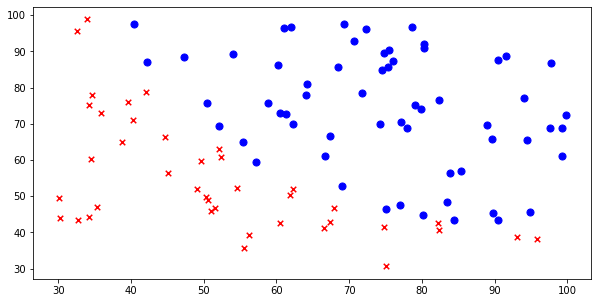

In [5]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=30,c='r',marker='x',label='Not Admitted')

In [6]:
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

Text(3.200000000000003, 0.5, 'Exam 2 Score')

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

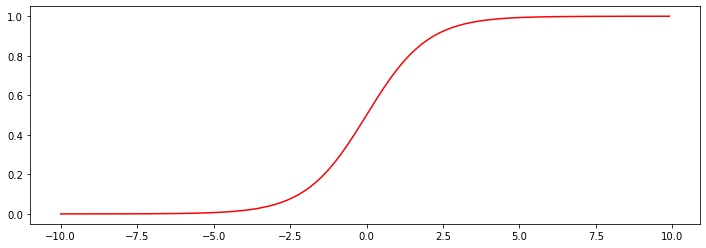

In [8]:
nums=np.arange(start=-10,stop=10,step=.1)
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums),'r')

In [9]:
def model(X,theta):
    return sigmoid(np.dot(X,theta.T))
# pdData.drop('Ones',axis=1)
pdData.insert(0,'Ones',1)

In [10]:
print(pdData.head())




   Ones     Exam 1     Exam 2  Admitted
0     1  34.623660  78.024693         0
1     1  30.286711  43.894998         0
2     1  35.847409  72.902198         0
3     1  60.182599  86.308552         1
4     1  79.032736  75.344376         1


In [11]:
# orig_data=pdData.as_matrix() 
orig_data=pdData.values
cols=orig_data.shape[1]
X=orig_data[:,0:cols-1]
y=orig_data[:,cols-1:cols]
print(X[:5])
print(y[:5])

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [12]:
theta=np.zeros([1,3])
theta

array([[0., 0., 0.]])

In [13]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (1, 3))

In [14]:
def cost(X,y,theta):
    left=np.multiply(-y,np.log(model(X,theta)))
    right=np.multiply((1-y),np.log(1-model(X,theta)))
    return np.sum((left-right)/len(X))
cost(X,y,theta)


0.6931471805599457

###  计算梯度 

In [15]:
def gradient(X,y,theta):
    grad=np.zeros(theta.shape)
    error=(model(X,theta)-y).ravel()
    for j in range(len(theta.ravel())):
        term=np.multiply(error,X[:,j])
        grad[0,j]=np.sum(term)/len(X)
    return grad

### Gradient descent 
比较3中不同梯度下降方法 

In [16]:
STOP_ITER=0
STOP_COST=1
STOP_GRAD=2
def stopGriterion(type,value,threshold):
    # 设置三种不同的停止策略 
    if type==STOP_ITER:return value>threshold
    elif type==STOP_COST:return abs(value[-1]-value[-2])<threshold
    elif type==STOP_GRAD:return np.linalg.norm(value)<threshold

In [17]:
import numpy.random
# 洗牌 
def shuffleData(data):
    np.random.shuffle(data)
    cols=data.shape[1]
    X=data[:,0:cols-1]
    y=data[:,cols-1:]
    return X,y

In [18]:
import time
n=100
def descent(data,theta,batchSize,stopType,thresh,alpha):
    # 梯度下降求值 
    init_time=time.time()
    i=0 # 迭代次数
    k=0 # batch
    X,y=shuffleData(data=data)
    grad=np.zeros(theta.shape) # 计算的梯度 
    costs=[cost(X,y,theta)] # 损失值   
    while True:
        grad=gradient(X[k:k+batchSize],y[k:k+batchSize],theta)
        k+=batchSize # 取 batch 数量个数据 
        if k>=n:
            k=0
            X,y=shuffleData(data) # 重新洗牌 
        theta=theta-alpha*grad # 参数更新 
        costs.append(cost(X,y,theta)) # 计算新的损失 
        i+=1
        if stopType==STOP_ITER: value=i
        elif stopType==STOP_COST:value=costs
        elif stopType==STOP_GRAD:value=grad
        if stopGriterion(stopType,value,thresh):break
    return theta,i-1,costs,grad,time.time()-init_time
     


In [19]:
       
def runExpe(data,theta,batchSize,stopType,thresh,alpha):
    # import pdb:pdb.set_trace()
    theta,iter,costs,grad,dur=descent(data,theta,batchSize,stopType,thresh,alpha)
    name='Original' if (data[:,1]>2).sum()>1 else 'Scaled'
    name+=' data -learning rate:{}-'.format(alpha )
    if batchSize==n: strDescType='Gradient'
    elif batchSize==1: strDescType='Stochastic'
    else:strDescType='Mini - batch ({})'.format(batchSize)
    name+=strDescType+'descent- Stop: '
    if stopType==STOP_ITER: strStop='{} iterations '.format(thresh)
    elif stopType==STOP_COST: strStop='costs change <  {}'.format(thresh)
    else:strStop='gradient norm <{}'.format(thresh)
    name+=strStop
    print('***{} \n Theta :{} - Iter: {} - Last cost :{:03.2f} - Duration :{:03.2f}s'
          .format(name,theta,iter,costs[-1],dur))
    fig,ax=plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)),costs,'r')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper()+' - Error vs . Iteration ')
    return theta

In [20]:
### 不同的停止策略 

In [21]:
### 设定迭代次数 

***Original data -learning rate:1e-06-Gradientdescent- Stop: 15000 iterations  
 Theta :[[-0.00097081  0.00891846  0.00193976]] - Iter: 15000 - Last cost :0.63 - Duration :4.89s


array([[-0.00097081,  0.00891846,  0.00193976]])

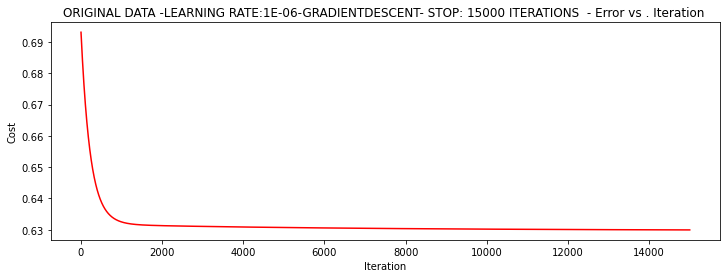

In [22]:
# 选择的梯度下降方法是基于所有样本的 
n=100 
runExpe(orig_data,theta,n,STOP_ITER,thresh=15000,alpha=0.000001)

In [ ]:
# 选择的梯度下降方法是基于所有样本的 
n=100 
runExpe(orig_data,theta,n,STOP_ITER,thresh=15000,alpha=0.000001)

In [ ]:
runExpe(orig_data,theta,n,STOP_COST,thresh=0.000001,alpha=0.001)

In [ ]:
runExpe(orig_data,theta,n,STOP_COST,thresh=0.00000001,alpha=0.000001)

In [ ]:
runExpe(orig_data,theta,n,STOP_GRAD,thresh=0.05,alpha=0.001)

***Original data -learning rate:0.001-Gradientdescent- Stop: gradient norm <0.05 
 Theta :[[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost :0.49 - Duration :16.65s


array([[-2.37033409,  0.02721692,  0.01899456]])

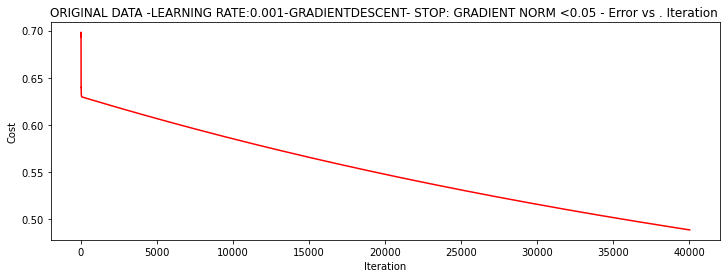

In [23]:
runExpe(orig_data,theta,n,STOP_GRAD,thresh=0.05,alpha=0.001)

In [25]:
##不同的梯度下降的选择 

***Original data -learning rate:0.001-Stochasticdescent- Stop: 5000 iterations  
 Theta :[[-0.39311105  0.08056509  0.02802634]] - Iter: 5000 - Last cost :2.14 - Duration :0.56s


array([[-0.39311105,  0.08056509,  0.02802634]])

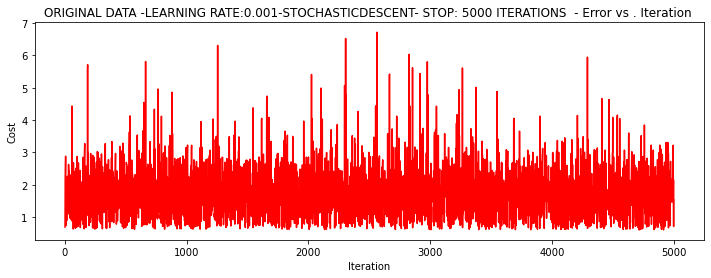

In [26]:
runExpe(orig_data,theta,1,STOP_ITER,thresh=5000,alpha=0.001)

In [ ]:
## 有点爆炸，很不稳定，再来试试把学习率调小一些。 

***Original data -learning rate:2e-06-Stochasticdescent- Stop: 15000 iterations  
 Theta :[[-0.00202233  0.00995371  0.00091406]] - Iter: 15000 - Last cost :0.63 - Duration :1.71s


array([[-0.00202233,  0.00995371,  0.00091406]])

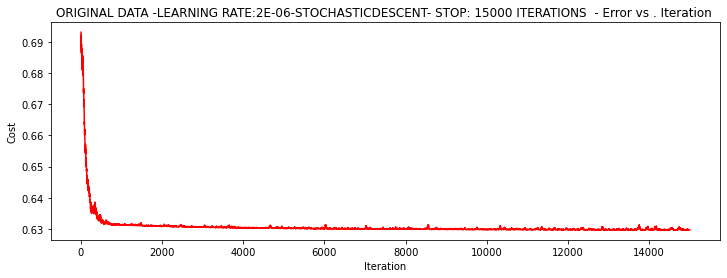

In [27]:
runExpe(orig_data,theta,1,STOP_ITER,thresh=15000,alpha=0.000002)

***Original data -learning rate:0.001-Mini - batch (16)descent- Stop: 15000 iterations  
 Theta :[[-1.03795643  0.03715051  0.02681544]] - Iter: 15000 - Last cost :1.00 - Duration :1.62s


array([[-1.03795643,  0.03715051,  0.02681544]])

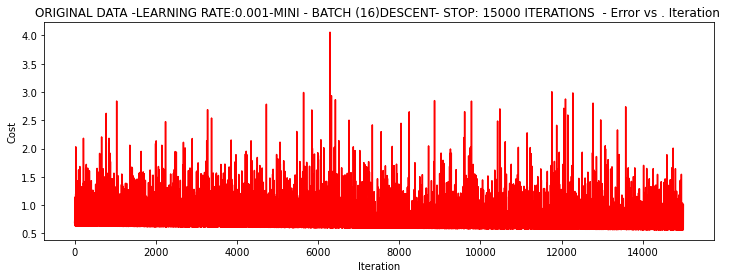

In [20]:
runExpe(orig_data,theta,16,STOP_ITER,thresh=15000,alpha=0.001)